In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'F:\Smartbridge\Dataset\Garbage classification\Garbage classification',target_size=(64,64),
                                          class_mode='categorical',batch_size=100)

Found 2527 images belonging to 6 classes.


In [5]:
len(x_train)

26

In [6]:
x_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Importing Libraries

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Creating Model

In [8]:
model=Sequential()

Adding Layers

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
##Hidden Layer 1
model.add(Dense(300,activation='relu'))
##Hidden Layer 2
model.add(Dense(150,activation='relu'))

Output Layer

In [13]:
model.add(Dense(6,activation='softmax'))

Compile the model

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [15]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)

C:\Users\kumar\AppData\Local\Temp\ipykernel_2932\3129788946.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)


Epoch 1/10
26/26 [==============================] - 10s 361ms/step - loss: 3.3919 - accuracy: 0.2256
Epoch 2/10
26/26 [==============================] - 9s 354ms/step - loss: 1.5700 - accuracy: 0.3478
Epoch 3/10
26/26 [==============================] - 9s 335ms/step - loss: 1.4313 - accuracy: 0.4294
Epoch 4/10
26/26 [==============================] - 11s 406ms/step - loss: 1.3291 - accuracy: 0.4753
Epoch 5/10
26/26 [==============================] - 10s 392ms/step - loss: 1.2715 - accuracy: 0.5057
Epoch 6/10
26/26 [==============================] - 10s 397ms/step - loss: 1.2306 - accuracy: 0.5283
Epoch 7/10
26/26 [==============================] - 10s 391ms/step - loss: 1.1633 - accuracy: 0.5631
Epoch 8/10
26/26 [==============================] - 10s 391ms/step - loss: 1.1207 - accuracy: 0.5877
Epoch 9/10
26/26 [==============================] - 9s 355ms/step - loss: 1.1084 - accuracy: 0.5940
Epoch 10/10
26/26 [==============================] - 11s 410ms/step - loss: 1.0429 - accuracy:

Save the model


In [16]:
model.save('garbage.h5')

Testing the model

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('garbage.h5')
img=image.load_img(r'F:\Smartbridge\Dataset\Garbage classification\Garbage classification\glass\glass20.jpg',
                   target_size=(64,64))

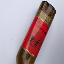

In [19]:
img

In [20]:
x=image.img_to_array(img)

In [21]:
x

array([[[219., 221., 234.],
        [218., 220., 233.],
        [218., 220., 233.],
        ...,
        [210., 212., 225.],
        [210., 212., 225.],
        [210., 212., 225.]],

       [[219., 221., 234.],
        [218., 220., 233.],
        [218., 220., 233.],
        ...,
        [209., 211., 224.],
        [209., 211., 224.],
        [210., 212., 225.]],

       [[217., 219., 232.],
        [218., 220., 233.],
        [218., 220., 233.],
        ...,
        [209., 211., 224.],
        [209., 211., 224.],
        [208., 210., 223.]],

       ...,

       [[202., 204., 217.],
        [202., 204., 217.],
        [201., 203., 216.],
        ...,
        [144., 147., 156.],
        [145., 145., 155.],
        [144., 144., 154.]],

       [[204., 206., 219.],
        [202., 204., 217.],
        [201., 203., 216.],
        ...,
        [144., 147., 156.],
        [145., 145., 155.],
        [144., 144., 154.]],

       [[204., 206., 219.],
        [202., 204., 217.],
        [201., 2

In [22]:
x.ndim

3

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[219., 221., 234.],
         [218., 220., 233.],
         [218., 220., 233.],
         ...,
         [210., 212., 225.],
         [210., 212., 225.],
         [210., 212., 225.]],

        [[219., 221., 234.],
         [218., 220., 233.],
         [218., 220., 233.],
         ...,
         [209., 211., 224.],
         [209., 211., 224.],
         [210., 212., 225.]],

        [[217., 219., 232.],
         [218., 220., 233.],
         [218., 220., 233.],
         ...,
         [209., 211., 224.],
         [209., 211., 224.],
         [208., 210., 223.]],

        ...,

        [[202., 204., 217.],
         [202., 204., 217.],
         [201., 203., 216.],
         ...,
         [144., 147., 156.],
         [145., 145., 155.],
         [144., 144., 154.]],

        [[204., 206., 219.],
         [202., 204., 217.],
         [201., 203., 216.],
         ...,
         [144., 147., 156.],
         [145., 145., 155.],
         [144., 144., 154.]],

        [[204., 206., 219.],
       

In [25]:
x.ndim

4

In [26]:
pred=np.argmax(model.predict(x),axis=1)

In [27]:
pred

array([3], dtype=int64)

In [28]:
index=['cardboard','glass','metal','paper','plastic','trash']
print(index[pred[0]])

paper


Open CV

In [29]:
import cv2

In [30]:
img=cv2.imread(r'F:\Smartbridge\Dataset\Garbage classification\Garbage classification\glass\glass20.jpg',1)

In [31]:
img

array([[[234, 221, 219],
        [234, 221, 219],
        [234, 221, 219],
        ...,
        [225, 212, 210],
        [225, 212, 210],
        [225, 212, 210]],

       [[234, 221, 219],
        [234, 221, 219],
        [234, 221, 219],
        ...,
        [225, 212, 210],
        [225, 212, 210],
        [225, 212, 210]],

       [[234, 221, 219],
        [234, 221, 219],
        [234, 221, 219],
        ...,
        [225, 212, 210],
        [225, 212, 210],
        [225, 212, 210]],

       ...,

       [[219, 206, 204],
        [219, 206, 204],
        [219, 206, 204],
        ...,
        [152, 142, 142],
        [152, 142, 142],
        [151, 141, 141]],

       [[219, 206, 204],
        [219, 206, 204],
        [219, 206, 204],
        ...,
        [152, 142, 142],
        [151, 141, 141],
        [151, 141, 141]],

       [[219, 206, 204],
        [219, 206, 204],
        [219, 206, 204],
        ...,
        [151, 141, 141],
        [151, 141, 141],
        [151, 141, 141]]

In [32]:
img1=cv2.imread(r'F:\Smartbridge\Dataset\Garbage classification\Garbage classification\glass\glass20.jpg',0)

In [33]:
img1

array([[222, 222, 222, ..., 213, 213, 213],
       [222, 222, 222, ..., 213, 213, 213],
       [222, 222, 222, ..., 213, 213, 213],
       ...,
       [207, 207, 207, ..., 143, 143, 142],
       [207, 207, 207, ..., 143, 142, 142],
       [207, 207, 207, ..., 142, 142, 142]], dtype=uint8)

In [34]:
print(img.shape)

(384, 512, 3)


In [35]:
img=cv2.imread(r'F:\Smartbridge\Dataset\Garbage classification\Garbage classification\glass\glass20.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CNN Video Analysis

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('garbage.h5')
video=cv2.VideoCapture(0)
index=['cardboard','glass','metal','paper','plastic','trash']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The Predicted Garbage is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()  